# Introduction to Mathematical Optimization


This notebook covers exercises on Python programming and analytical optimization of simple functions.

In [1]:
# Install dependencies using uv
import sys
!{sys.executable} -m pip install uv
!uv pip install numpy matplotlib scipy --system

Using Python 3.12.6 environment at: C:\Users\cestm\AppData\Local\Programs\Python\Python312
Audited 3 packages in 326ms


In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

## Exercise 1: Python Plotting of an Analytical Optimization of a Simple Function

Consider the function:
$$f(x) = x^4 - x^2 - 2x$$

We want to study its behavior over the interval $x \in [-2, 2]$.

In [3]:
# Define the function f(x) = x^4 - x^2 - 2x
def f(x):
    return x**4 - x**2 - 2*x

# Define the derivative f'(x) = 4x^3 - 2x - 2
def df(x):
    return 4*x**3 - 2*x - 2

# Define the second derivative f''(x) = 12x^2 - 2
def d2f(x):
    return 12*x**2 - 2

### Plot the function over [-2, 2]

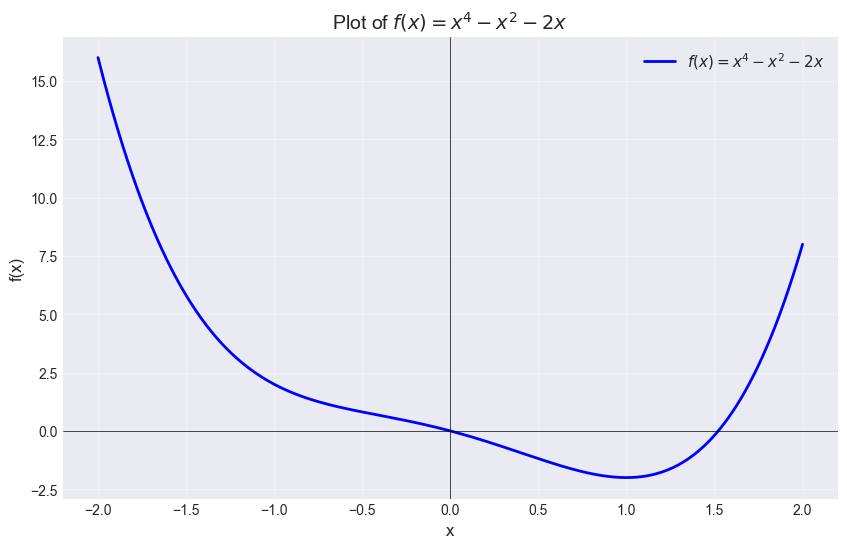

Minimum value on [-2, 2]: f(0.9990) = -2.0000
Maximum value on [-2, 2]: f(-2.0000) = 16.0000


In [4]:
# Create x values
x = np.linspace(-2, 2, 1000)
y = f(x)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2, label='$f(x) = x^4 - x^2 - 2x$')
plt.grid(True, alpha=0.3)
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.title('Plot of $f(x) = x^4 - x^2 - 2x$', fontsize=14)
plt.legend(fontsize=11)
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
plt.show()

print(f"Minimum value on [-2, 2]: f({x[np.argmin(y)]:.4f}) = {np.min(y):.4f}")
print(f"Maximum value on [-2, 2]: f({x[np.argmax(y)]:.4f}) = {np.max(y):.4f}")

### Find critical points analytically

Critical points occur where $f'(x) = 0$:
$$f'(x) = 4x^3 - 2x - 2 = 0$$

In [5]:
# Find roots of the derivative numerically
from scipy.optimize import fsolve

# Find critical points by solving f'(x) = 0
initial_guesses = [-2, 0, 2]
critical_points = []

for guess in initial_guesses:
    root = fsolve(df, guess)[0]
    if -2 <= root <= 2 and not any(abs(root - cp) < 1e-6 for cp in critical_points):
        critical_points.append(root)

critical_points = sorted(critical_points)

print("Critical points:")
for cp in critical_points:
    second_deriv = d2f(cp)
    point_type = "Local minimum" if second_deriv > 0 else "Local maximum" if second_deriv < 0 else "Inflection point"
    print(f"  x = {cp:.6f}, f(x) = {f(cp):.6f}, f''(x) = {second_deriv:.6f} → {point_type}")

Critical points:
  x = -0.408390, f(x) = 0.677815, f''(x) = 0.001394 → Local minimum
  x = -0.408203, f(x) = 0.677542, f''(x) = -0.000443 → Local maximum
  x = 1.000000, f(x) = -2.000000, f''(x) = 10.000000 → Local minimum


C:\Users\cestm\AppData\Local\Temp\ipykernel_26212\2383003378.py:9: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  root = fsolve(df, guess)[0]


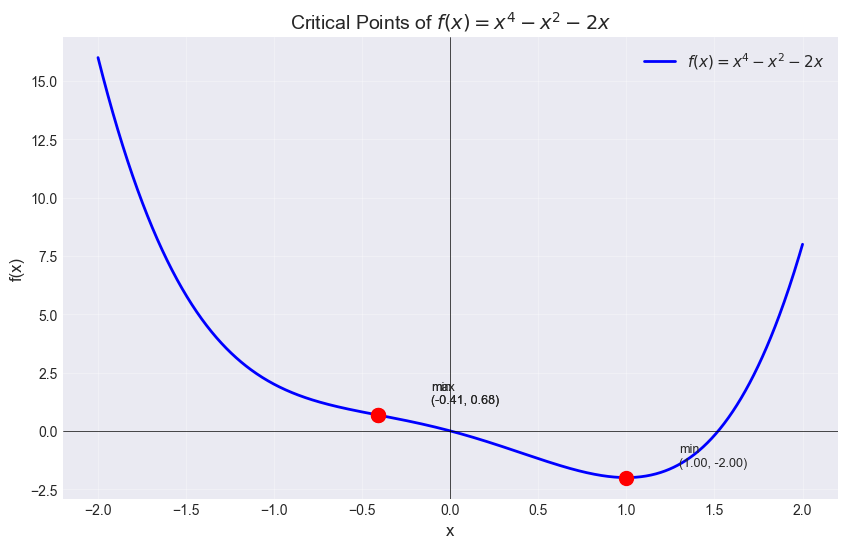

In [6]:
# Plot function with critical points marked
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2, label='$f(x) = x^4 - x^2 - 2x$')

# Mark critical points
for cp in critical_points:
    plt.plot(cp, f(cp), 'ro', markersize=10)
    second_deriv = d2f(cp)
    label = "min" if second_deriv > 0 else "max"
    plt.annotate(f'{label}\n({cp:.2f}, {f(cp):.2f})', 
                xy=(cp, f(cp)), xytext=(cp+0.3, f(cp)+0.5),
                fontsize=9, ha='left')

plt.grid(True, alpha=0.3)
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.title('Critical Points of $f(x) = x^4 - x^2 - 2x$', fontsize=14)
plt.legend(fontsize=11)
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
plt.show()

## Exercise 2: Plotting a Concave Quartic

Plot the function:
$$f(x) = -x^4 + 2x^2 + x$$

over the interval $x \in [-3, 3]$.

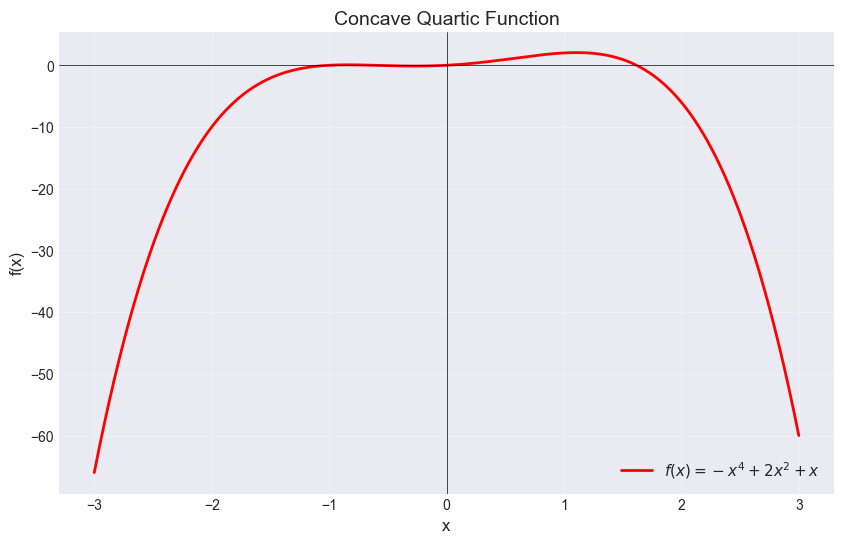

In [7]:
# Define the concave quartic function
def f2(x):
    return -x**4 + 2*x**2 + x

def df2(x):
    return -4*x**3 + 4*x + 1

def d2f2(x):
    return -12*x**2 + 4

# Create x values
x2 = np.linspace(-3, 3, 1000)
y2 = f2(x2)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x2, y2, 'r-', linewidth=2, label='$f(x) = -x^4 + 2x^2 + x$')
plt.grid(True, alpha=0.3)
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.title('Concave Quartic Function', fontsize=14)
plt.legend(fontsize=11)
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
plt.show()

In [8]:
# Find critical points
initial_guesses2 = [-2, -1, 0, 1, 2]
critical_points2 = []

for guess in initial_guesses2:
    root = fsolve(df2, guess)[0]
    if -3 <= root <= 3 and not any(abs(root - cp) < 1e-6 for cp in critical_points2):
        critical_points2.append(root)

critical_points2 = sorted(critical_points2)

print("Critical points for f(x) = -x^4 + 2x^2 + x:")
for cp in critical_points2:
    second_deriv = d2f2(cp)
    point_type = "Local maximum" if second_deriv < 0 else "Local minimum" if second_deriv > 0 else "Inflection point"
    print(f"  x = {cp:.6f}, f(x) = {f2(cp):.6f}, f''(x) = {second_deriv:.6f} → {point_type}")

Critical points for f(x) = -x^4 + 2x^2 + x:
  x = -0.837565, f(x) = 0.073342, f''(x) = -4.418190 → Local maximum
  x = -0.269594, f(x) = -0.129515, f''(x) = 3.127826 → Local minimum
  x = 1.107160, f(x) = 2.056173, f''(x) = -10.709636 → Local maximum


## Exercise 3: Multi-dimensional Optimization - Sum of Exponentials

Consider the function:
$$f(x, y) = e^x + e^y + e^{x+y}$$

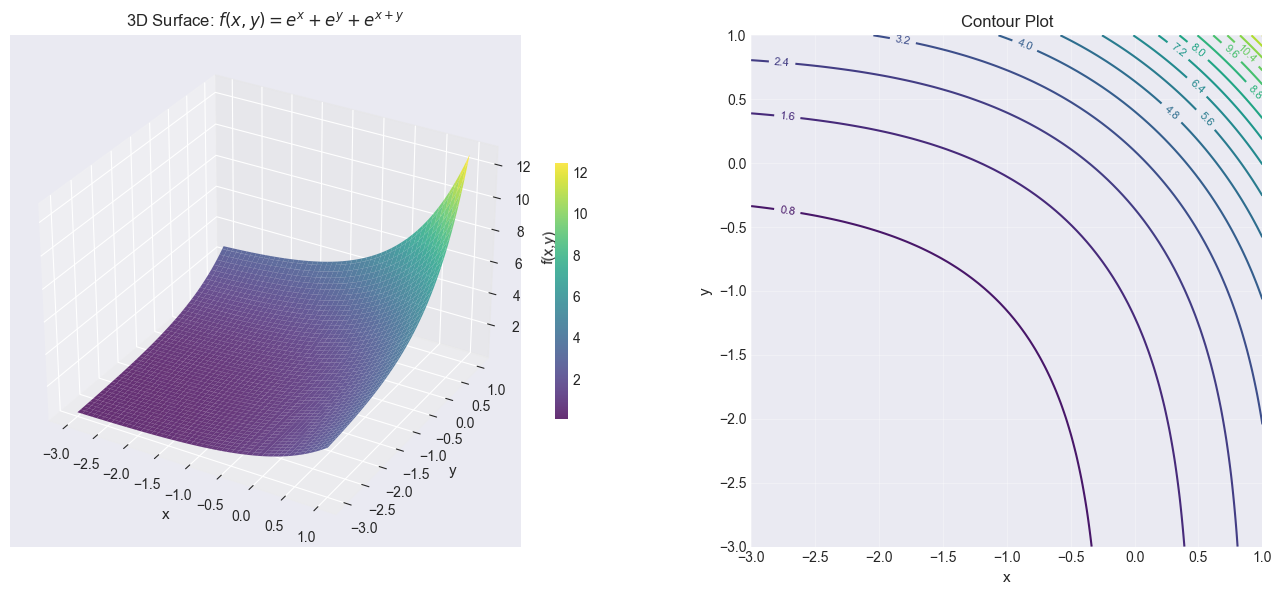


Note: This function has no finite minimum as it goes to infinity.
As x, y → -∞, the function approaches 0 from above.


In [9]:
# Define the 2D function
def f3(x, y):
    return np.exp(x) + np.exp(y) + np.exp(x + y)

# For optimization, we need a function that takes a vector
def f3_vec(X):
    return np.exp(X[0]) + np.exp(X[1]) + np.exp(X[0] + X[1])

# Create meshgrid for 3D plotting
x_range = np.linspace(-3, 1, 100)
y_range = np.linspace(-3, 1, 100)
X3, Y3 = np.meshgrid(x_range, y_range)
Z3 = f3(X3, Y3)

# 3D Surface plot
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X3, Y3, Z3, cmap='viridis', alpha=0.8, edgecolor='none')
ax1.set_xlabel('x', fontsize=11)
ax1.set_ylabel('y', fontsize=11)
ax1.set_zlabel('f(x,y)', fontsize=11)
ax1.set_title('3D Surface: $f(x,y) = e^x + e^y + e^{x+y}$', fontsize=12)
fig.colorbar(surf, ax=ax1, shrink=0.5)

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contour(X3, Y3, Z3, levels=20, cmap='viridis')
ax2.clabel(contour, inline=True, fontsize=8)
ax2.set_xlabel('x', fontsize=11)
ax2.set_ylabel('y', fontsize=11)
ax2.set_title('Contour Plot', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.set_aspect('equal')

plt.tight_layout()
plt.show()

print("\nNote: This function has no finite minimum as it goes to infinity.")
print("As x, y → -∞, the function approaches 0 from above.")

## Exercise 4: Multi-dimensional Optimization - Quadratic with Cubic Terms

$$f(x, y) = (x - 2)^2 + 2(y + 3)^2 + 3xy$$

Minimum found at: x = 1674.789360, y = -1521.367262
Function value at minimum: f(x,y) = -234806.581918


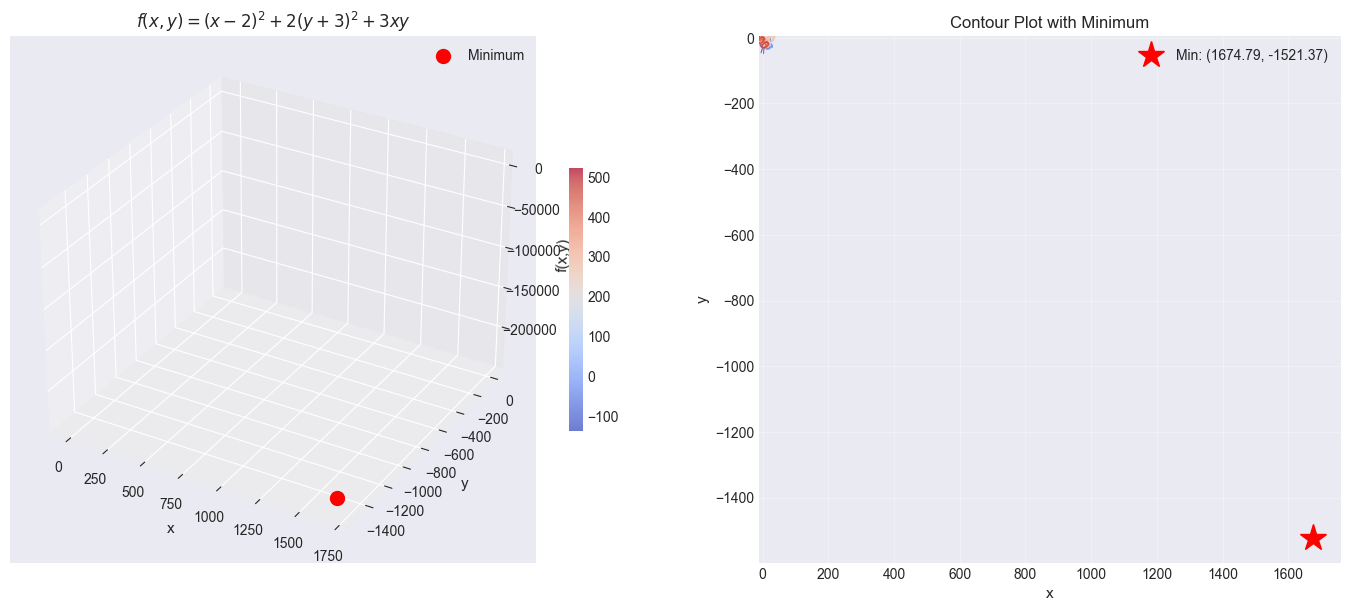

In [10]:
# Define the function
def f4(x, y):
    return (x - 2)**2 + 2*(y + 3)**2 + 3*x*y

def f4_vec(X):
    return (X[0] - 2)**2 + 2*(X[1] + 3)**2 + 3*X[0]*X[1]

# Create meshgrid
x_range4 = np.linspace(-10, 10, 100)
y_range4 = np.linspace(-10, 5, 100)
X4, Y4 = np.meshgrid(x_range4, y_range4)
Z4 = f4(X4, Y4)

# Find minimum using scipy
result = minimize(f4_vec, x0=[0, 0], method='BFGS')
x_min, y_min = result.x
f_min = result.fun

print(f"Minimum found at: x = {x_min:.6f}, y = {y_min:.6f}")
print(f"Function value at minimum: f(x,y) = {f_min:.6f}")

# 3D Surface plot
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X4, Y4, Z4, cmap='coolwarm', alpha=0.7, edgecolor='none')
ax1.scatter([x_min], [y_min], [f_min], color='red', s=100, marker='o', label='Minimum')
ax1.set_xlabel('x', fontsize=11)
ax1.set_ylabel('y', fontsize=11)
ax1.set_zlabel('f(x,y)', fontsize=11)
ax1.set_title('$f(x,y) = (x-2)^2 + 2(y+3)^2 + 3xy$', fontsize=12)
ax1.legend()
fig.colorbar(surf, ax=ax1, shrink=0.5)

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contour(X4, Y4, Z4, levels=30, cmap='coolwarm')
ax2.clabel(contour, inline=True, fontsize=8)
ax2.plot(x_min, y_min, 'r*', markersize=20, label=f'Min: ({x_min:.2f}, {y_min:.2f})')
ax2.set_xlabel('x', fontsize=11)
ax2.set_ylabel('y', fontsize=11)
ax2.set_title('Contour Plot with Minimum', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_aspect('equal')

plt.tight_layout()
plt.show()

## Exercise 5: Plotting Cosines - Area Occupation of a Transition of Two Variables

$$f(x, y) = \cos(x) + \cos(x + y)$$

Study this function over $x, y \in [0, 10]$.

<>:22: SyntaxWarning: invalid escape sequence '\c'
<>:22: SyntaxWarning: invalid escape sequence '\c'
C:\Users\cestm\AppData\Local\Temp\ipykernel_26212\2677751598.py:22: SyntaxWarning: invalid escape sequence '\c'
  ax1.set_title('$f(x,y) = \cos(x) + \cos(x+y)$', fontsize=12)


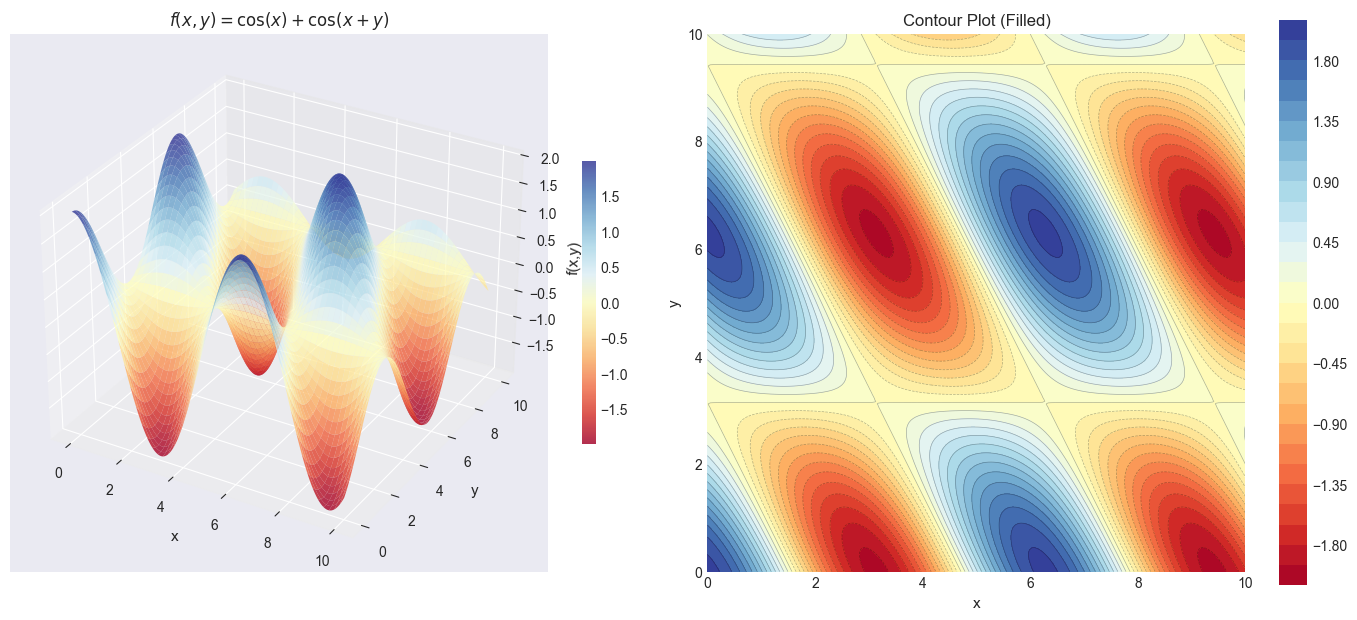

Function range: [-1.9995, 2.0000]
This function oscillates with period related to 2π


In [11]:
# Define the function
def f5(x, y):
    return np.cos(x) + np.cos(x + y)

def f5_vec(X):
    return np.cos(X[0]) + np.cos(X[0] + X[1])

# Create meshgrid
x_range5 = np.linspace(0, 10, 200)
y_range5 = np.linspace(0, 10, 200)
X5, Y5 = np.meshgrid(x_range5, y_range5)
Z5 = f5(X5, Y5)

# 3D Surface plot
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X5, Y5, Z5, cmap='RdYlBu', alpha=0.8, edgecolor='none')
ax1.set_xlabel('x', fontsize=11)
ax1.set_ylabel('y', fontsize=11)
ax1.set_zlabel('f(x,y)', fontsize=11)
ax1.set_title('$f(x,y) = \cos(x) + \cos(x+y)$', fontsize=12)
fig.colorbar(surf, ax=ax1, shrink=0.5)

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X5, Y5, Z5, levels=30, cmap='RdYlBu')
ax2.contour(X5, Y5, Z5, levels=30, colors='black', alpha=0.3, linewidths=0.5)
ax2.set_xlabel('x', fontsize=11)
ax2.set_ylabel('y', fontsize=11)
ax2.set_title('Contour Plot (Filled)', fontsize=12)
ax2.set_aspect('equal')
fig.colorbar(contour, ax=ax2)

plt.tight_layout()
plt.show()

print(f"Function range: [{np.min(Z5):.4f}, {np.max(Z5):.4f}]")
print(f"This function oscillates with period related to 2π")

In [12]:
# Find local minima and maxima numerically
from scipy.optimize import minimize, differential_evolution

# Find global minimum
bounds = [(0, 10), (0, 10)]
result_min = differential_evolution(f5_vec, bounds, seed=42)
print(f"\nGlobal minimum in [0,10]×[0,10]:")
print(f"  Location: x = {result_min.x[0]:.4f}, y = {result_min.x[1]:.4f}")
print(f"  Value: f(x,y) = {result_min.fun:.4f}")

# Find global maximum (minimize negative)
result_max = differential_evolution(lambda X: -f5_vec(X), bounds, seed=42)
print(f"\nGlobal maximum in [0,10]×[0,10]:")
print(f"  Location: x = {result_max.x[0]:.4f}, y = {result_max.x[1]:.4f}")
print(f"  Value: f(x,y) = {-result_max.fun:.4f}")


Global minimum in [0,10]×[0,10]:
  Location: x = 3.1416, y = 6.2832
  Value: f(x,y) = -2.0000

Global maximum in [0,10]×[0,10]:
  Location: x = 6.2832, y = 6.2832
  Value: f(x,y) = 2.0000


## Exercise 6: Analyzing Optimization Results

Let's compare different optimization methods on our functions.

In [13]:
# Compare optimization methods on f4
methods = ['BFGS', 'Nelder-Mead', 'Powell', 'CG']
initial_point = [0, 0]

print("Comparison of optimization methods on f(x,y) = (x-2)^2 + 2(y+3)^2 + 3xy:")
print("="*80)

results_comparison = []
for method in methods:
    result = minimize(f4_vec, x0=initial_point, method=method)
    results_comparison.append({
        'method': method,
        'x': result.x,
        'f': result.fun,
        'nit': result.nit if 'nit' in result else 'N/A',
        'success': result.success
    })
    print(f"\n{method}:")
    print(f"  Solution: x = {result.x[0]:.6f}, y = {result.x[1]:.6f}")
    print(f"  Function value: {result.fun:.6f}")
    print(f"  Iterations: {result.nit if 'nit' in result else 'N/A'}")
    print(f"  Success: {result.success}")

Comparison of optimization methods on f(x,y) = (x-2)^2 + 2(y+3)^2 + 3xy:

BFGS:
  Solution: x = 1674.789360, y = -1521.367262
  Function value: -234806.581918
  Iterations: 2
  Success: False

Nelder-Mead:
  Solution: x = 391795688716683013528446105999638528.000000, y = -316180779399797319031257309196058624.000000
  Function value: -18190366451057063441814022161305988590791303286248987276272095211814912.000000
  Iterations: 203
  Success: False

Powell:
  Solution: x = nan, y = nan
  Function value: nan
  Iterations: 3
  Success: False

CG:
  Solution: x = 126628221.674431, y = -80641835.805161
  Function value: -1593680367439952.000000
  Iterations: 2
  Success: True


c:\Users\cestm\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_optimize.py:2972: RuntimeWarning: overflow encountered in scalar multiply
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
c:\Users\cestm\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_optimize.py:2965: RuntimeWarning: overflow encountered in scalar multiply
  tmp1 = (xb - xa) * (fb - fc)
c:\Users\cestm\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_optimize.py:2972: RuntimeWarning: invalid value encountered in scalar divide
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
c:\Users\cestm\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_optimize.py:2966: RuntimeWarning: overflow encountered in scalar multiply
  tmp2 = (xb - xc) * (fb - fa)
c:\Users\cestm\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_optimize.py:2967: RuntimeWarning: invalid value encountered in scalar subtract
 

## Summary and Conclusions

This notebook demonstrated:

1. **1D Optimization**: Analytical and numerical methods for finding extrema of single-variable functions
2. **Multi-dimensional Functions**: Visualization using 3D plots and contour maps
3. **Optimization Algorithms**: Comparison of different numerical optimization methods
4. **Periodic Functions**: Analysis of trigonometric functions in 2D

Key takeaways:
- Critical points can be found by setting derivatives to zero
- Second derivatives help classify extrema (max vs min)
- Numerical optimization is essential for complex functions
- Visualization helps understand function behavior
- Different optimization methods have varying efficiency and robustness

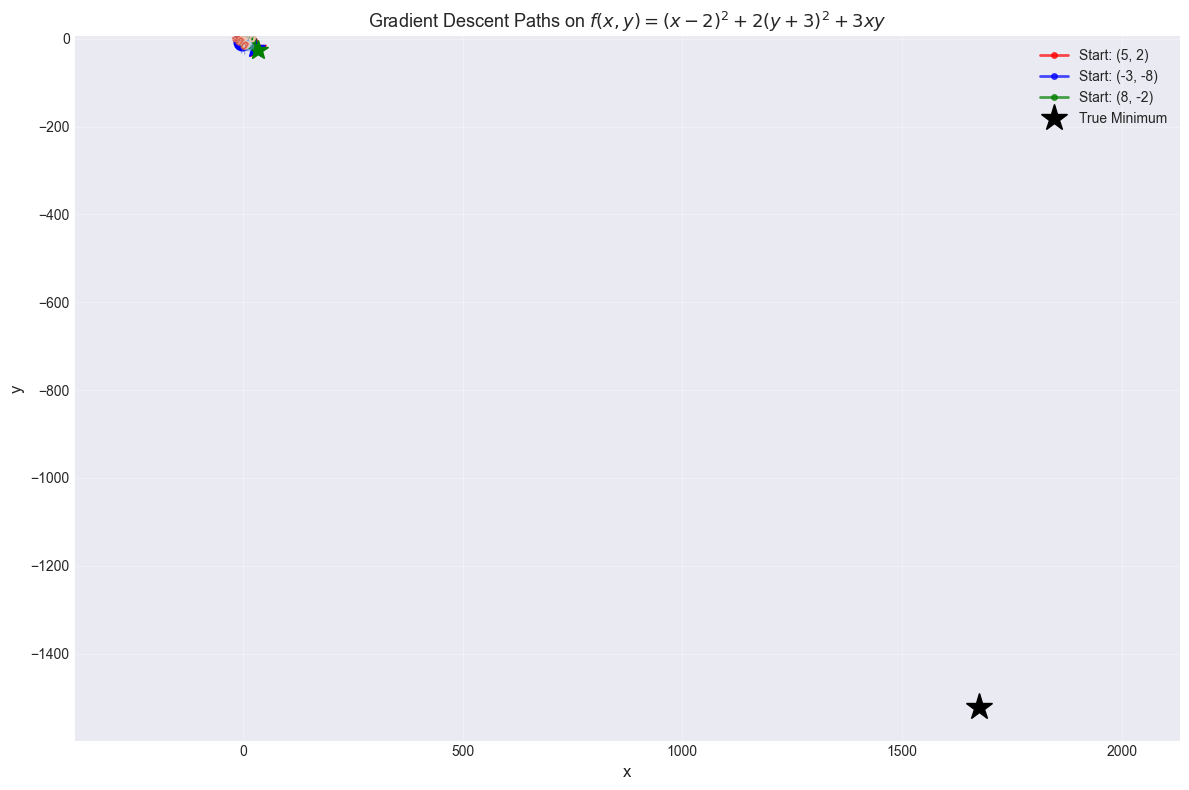

In [14]:
# Additional analysis: Gradient descent visualization for f4
def gradient_f4(X):
    x, y = X[0], X[1]
    df_dx = 2*(x - 2) + 3*y
    df_dy = 4*(y + 3) + 3*x
    return np.array([df_dx, df_dy])

# Manual gradient descent
def gradient_descent(f, grad_f, x0, learning_rate=0.1, max_iter=100, tol=1e-6):
    path = [x0.copy()]
    x = x0.copy()
    
    for i in range(max_iter):
        grad = grad_f(x)
        x_new = x - learning_rate * grad
        path.append(x_new.copy())
        
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    
    return np.array(path)

# Run gradient descent from different starting points
starting_points = [np.array([5, 2]), np.array([-3, -8]), np.array([8, -2])]
colors = ['red', 'blue', 'green']

plt.figure(figsize=(12, 8))
contour = plt.contour(X4, Y4, Z4, levels=30, cmap='coolwarm', alpha=0.6)
plt.clabel(contour, inline=True, fontsize=8)

for start, color in zip(starting_points, colors):
    path = gradient_descent(f4_vec, gradient_f4, start, learning_rate=0.05, max_iter=50)
    plt.plot(path[:, 0], path[:, 1], 'o-', color=color, linewidth=2, 
             markersize=4, label=f'Start: ({start[0]}, {start[1]})', alpha=0.7)
    plt.plot(path[0, 0], path[0, 1], 'o', color=color, markersize=12)
    plt.plot(path[-1, 0], path[-1, 1], '*', color=color, markersize=15)

plt.plot(x_min, y_min, 'k*', markersize=20, label='True Minimum')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Gradient Descent Paths on $f(x,y) = (x-2)^2 + 2(y+3)^2 + 3xy$', fontsize=13)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.tight_layout()
plt.show()